Within-talkpage-network is modeled as a directed graph.

In [1]:
# define functions to work with graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def extractNumberofItem(line, delim):
    l = line.split(delim);
    return int(l[3]);

def extractNumberofProp(line,delim):
    l = line.split(delim);
    return int(l[4])
    
def extractTime(line, delim):
    v = line.split(delim)
    return v[2]

def extractEdge(line, delim):
    v = line.split(delim)
    return v[0]+ ';' + v[1]

def createGraph(pathtographfile, delim, artifact):
    f = open(pathtographfile, 'r')
    edge_to_numItems = {}
    edge_to_numProps = {}
    edge_to_times = {}
    count = 0
    firstDate = None
    # collect edges
    for line in f:
        line = line.rstrip()
        
        #index by edge
        key = extractEdge(line, delim)
        
        # extract first date
        if count == 0:
            firstDate = extractTime(line,delim)
            count += 1
        
        # extract second date
        if key not in edge_to_numItems:
            edge_to_numItems[key] = []
        edge_to_numItems[key].append(extractNumberofItem(line,delim))
        if key not in edge_to_numProps:
            edge_to_numProps[key] = []
        edge_to_numProps[key].append(extractNumberofProp(line,delim))
        if key not in edge_to_times:
            edge_to_times[key] = []
        edge_to_times[key].append(extractTime(line,delim))
    
    # build graphs
    G = nx.DiGraph(firstDate=firstDate)
    for e in edge_to_numItems.keys():
        v = e.split(delim)
        if not artifact:
            G.add_edge(v[0], v[1], items=edge_to_numItems[e], props=edge_to_numProps[e])
        else:
            if sum(edge_to_numItems[e]) + sum(edge_to_numProps[e]) != 0:
                G.add_edge(v[0], v[1], items=edge_to_numItems[e], props=edge_to_numProps[e])
            
    return G
# def createGraph(pathtographfile, delim):
#     f = open(pathtographfile, 'r')
#     edge_to_weight = {}
#     count = 0
#     firstDate = None
#     for line in f:
#         key = line.rstrip()
#         if count == 0:
#             firstDate = extractTime(key,delim)
#             count += 1
#         if key in edge_to_weight:
#             edge_to_weight[key] += 1
#         else:
#             edge_to_weight[key] = 1
#     G = nx.DiGraph(firstDate=firstDate)
#     for (e,w) in edge_to_weight.items():
#         v = e.split(delim)
#         G.add_edge(v[0], v[1], weight=w, time=v[2])
#     return G

def computeAndPlotDegreeStats(G):
    in_degrees = []
    count = 0
    for indeg in G.in_degree_iter():
        in_degrees.append(indeg[1])
        if (indeg[1] >= 1):
            count += 1
        

    print("mean in-degree", np.mean(in_degrees), "sd = ", np.std(in_degrees))
    print ("max in-degree = ", np.max(in_degrees))
    print("w. in-degree >= 1 = ", count)

    out_degrees = []
    count = 0
    for outdeg in G.out_degree_iter():
        out_degrees.append(outdeg[1])
        if (outdeg[1] >= 1):
            count += 1
    print("mean out-degree", np.mean(out_degrees), " sd =", np.std(out_degrees))
    print ("max out-degree = ", np.max(out_degrees))
    print("w. out-degree >= 1 = ", count)
   
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(12,6))
    idplot = fig.add_subplot(121)
    idplot.hist(in_degrees, bins=50)
    idplot.set_title("in-degree distribution")
    odplot = fig.add_subplot(122)
    odplot.hist(out_degrees, bins=50)
    odplot.set_title("out-degree distribution")
    plt.show()
    
    
def boxPlotDegreeDist(G):
    in_degrees = []
    for indeg in G.in_degree_iter():
        in_degrees.append(indeg[1])
    print("Avg. indegree ", np.mean(in_degrees))
    print("Std. indegree ", np.std(in_degrees))
    out_degrees = []
    for outdeg in G.out_degree_iter():
        out_degrees.append(outdeg[1])
    print("Avg. outdegree", np.mean(out_degrees))
    print("Std. outdegree", np.std(out_degrees))
    data = [in_degrees, out_degrees]
    plt.figure()
    plt.boxplot(data, labels=["in-degree", "out-degree"])
    plt.savefig("/Users/totucuong-standard/Projects/wikisocial-paper/images/boxplot_degree")
    plt.show()
    
#     fig2 = plt.figure(figsize=(12,6))
#     indegbox = fig2.add_subplot(121)
#     indegbox.set_title("in-degree")
#     indegbox.boxplot(in_degrees)
#     outdegbox = fig2.add_subplot(122)
#     outdegbox.set_title("out-degree")
#     outdegbox.boxplot(out_degrees)
#     plt.show()


def drawGraph(G, name):
    nx.draw(G, node_size=10)
    plt.savefig(name)
    plt.show()
    
def analyzeComponents(G):
    UG = G.to_undirected()
    largest_cc = max(nx.connected_components(UG), key=len)
    print("number of components:", nx.number_connected_components(UG))
    print("number of nodes in large connected component", len(largest_cc))
    print("size of giant component compared to original graph", len(largest_cc)/G.number_of_nodes()*100)
    print("size of giant component", len(largest_cc))
    

# compute top-k indegree of a network
# direction={'in', 'out'}
# k = number of nodes
# G = a graph
def top_degree(direction,k,G):
    degree_dict = None
    if (direction == 'in'):
        print('in degree computation...')
        degree_dict = wtpNetwork.in_degree()
    elif (direction == 'out'):
        print('out degree computation....')
        degree_dict = wtpNetwork.out_degree()
    else:
        raise ValueError("direction must be in or out")
    degree_tuples = [(k,v) for k, v in degree_dict.items()]
    degree_tuples_sorted = sorted(degree_tuples, key = lambda x: x[1], reverse=True)
    result = []
    for i in range(10):
        result.append(degree_tuples_sorted[i])
    return result

def degree_assortativity_analysis(G, name):
    # r(in, out)
    result = {}
    print("Degree assortativity of graph ", name)
    r_in_out = nx.degree_assortativity_coefficient(G, x='in', y='out')
    print('r(in,out) = ', r_in_out)
    result['in_out'] = r_in_out

    # r(in, in)
    r_in_in = nx.degree_assortativity_coefficient(G, x='in', y='in')
    print('r(in,in) = ', r_in_in)
    result['in_in'] = r_in_in

    # r(out, in)
    r_out_in = nx.degree_assortativity_coefficient(G, x='out', y='in')
    print('r(out,in) = ', r_out_in)
    result['out_in'] = r_out_in

    # r(out, out)
    r_out_out = nx.degree_assortativity_coefficient(G, x='out', y='out')
    print('r(out,out) = ', r_out_out)
    result['out_out'] = r_out_out
    return result
    
    
def generate_random_graph(G):
    in_degs = [node[1] for node in G.in_degree_iter()]
    out_degs = [node[1] for node in G.out_degree_iter()]
    random_graphs = []
    for i in range(100):
        random_graphs.append(nx.directed_configuration_model(in_degs,out_degs))
    return random_graphs


def compute_assortativity_mean_std(graphs, x='in', y='out'):
    result = {}
    assortativities = []
    for i in range(100):
        assortativities.append(nx.degree_assortativity_coefficient(graphs[i], x, y))
    result['mean'] = np.mean(assortativities)
    result['std'] = np.std(assortativities)
    return result

def zscore(r, mean, std):
    return (r-mean)/std
    

def compute_z_score_for_assortativity(G, name):
    """
    G: graph that we want to study assortitativity
    name: name of graph that we want to study
    """
    # compute degree assortativity
    assort = degree_assortativity_analysis(G,name)
    
    # compute z-score to see the confidence |Z| > 2 is consisdered to be believable
    random_graphs = generate_random_graph(G)
    
    # z(in,out)
    stats = compute_assortativity_mean_std(random_graphs, x='in', y='out')
    print('z(in,out) = ', zscore(assort['in_out'], stats['mean'], stats['std']))
    print('std_in_out = ', stats['std'])
    print('mean_in_out = ', stats['mean'])

    # z(in, in)
    stats = compute_assortativity_mean_std(random_graphs, x='in', y='in')
    print('z(in,in) = ', zscore(assort['in_in'], stats['mean'], stats['std']))
    print('std_in_in = ', stats['std'])
    print('mean_in_in = ', stats['mean'])

    # z(out, in)
    stats = compute_assortativity_mean_std(random_graphs, x='out', y='in')
    print('z(out,in) = ', zscore(assort['out_in'], stats['mean'], stats['std']))
    print('std_out_in = ', stats['std'])
    print('mean_out_in = ', stats['mean'])


    # z(out, out)
    stats = compute_assortativity_mean_std(random_graphs, x='out', y='out')
    print('z(out, out) = ', zscore(assort['out_out'], stats['mean'], stats['std']))
    print('std_out_out = ', stats['std'])
    print('mean_out_out = ', stats['mean'])

                  

# Within-Network-Page Network Analysis

First we take into account all edges even if they do not mention any items/properties

In [3]:
wtpNetwork = createGraph(pathtographfile="../data/wtp-networks/wtpnetwork_timestamp.csv", delim=";", artifact=False)
print("number of nodes: ",str(wtpNetwork.number_of_nodes()))
print("number of edges: ",str(wtpNetwork.number_of_edges()))


number of nodes:  2686
number of edges:  10214


mean in-degree 3.8026805659 sd =  9.12034662303
max in-degree =  154
w. in-degree >= 1 =  2160
mean out-degree 3.8026805659  sd = 10.3843741922
max out-degree =  213
w. out-degree >= 1 =  2329


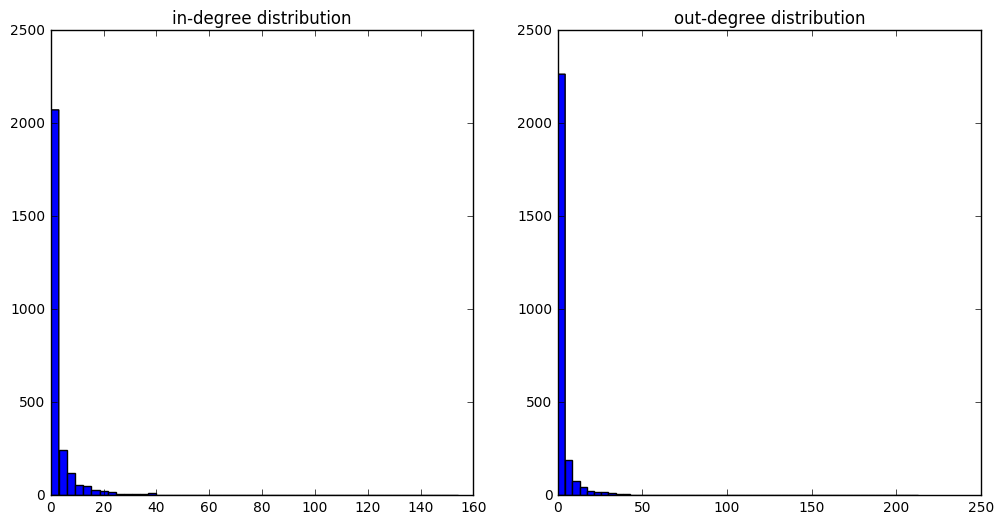

In [4]:
computeAndPlotDegreeStats(wtpNetwork)

Avg. indegree  3.8026805659
Std. indegree  9.12034662303
Avg. outdegree 3.8026805659
Std. outdegree 10.3843741922


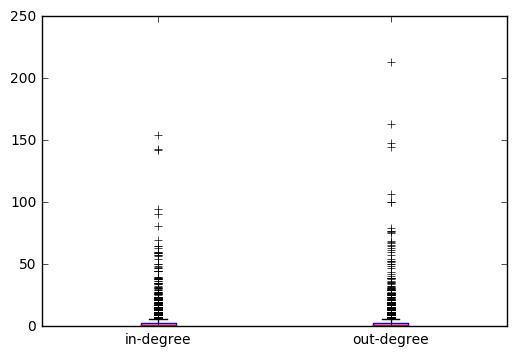

In [129]:
boxPlotDegreeDist(wtpNetwork)

Here we look closer at the outlier of in-degree and out-degree people.

In [130]:
# in degree dictionary: node -> in-degree
node_to_indegree = dict(list(wtpNetwork.in_degree_iter()))
max_in_degree = np.max(list(node_to_indegree.values()))

# inverted index: in-degree -> node
indegree_to_node = [set() for x in range(0, max_in_degree+1)]
for k, v in node_to_indegree.items():
    indegree_to_node[v].add(k)
    
print("The person got asked alot ", indegree_to_node[max_in_degree])
print ("max in degree", max_in_degree)
# out degree dictionary: node -> out-degree
node_to_outdegree = dict(list(wtpNetwork.out_degree_iter()))
max_out_degree = np.max(list(node_to_outdegree.values()))
# inverted index: out-degree -> node
outdegree_to_node = [set() for x in range(0, max_out_degree+1)]
for k, v in node_to_outdegree.items():
    outdegree_to_node[v].add(k)
    
print("The person asked alot ", outdegree_to_node[max_out_degree])
# print ("max out degree", max_out_degree)

The person got asked alot  {'Ymblanter'}
max in degree 154
The person asked alot  {'User:Rotsaert8000'}


## Top influnencers

In [131]:
# ranking by in-degree
top_10_indeg = top_degree(direction='in', G=wtpNetwork, k=10)
print("top 10 in-degree")
print(top_10_indeg)

# ranking by out-degree
top_10_outdeg = top_degree(direction='out', G=wtpNetwork, k=10)
print("top 10 out-degree")
print(top_10_outdeg)



in degree computation...
top 10 in-degree
[('Ymblanter', 154), ('SamoaBot', 143), ('Ricordisamoa', 142), ('Vogone', 95), ('Kolja21', 91), ('Alexmar983', 81), ('GZWDer', 70), ('Jasper_Deng', 65), ('Jared_Preston', 65), ('Tobias1984', 63)]
out degree computation....
top 10 out-degree
[('User:Rotsaert8000', 213), ('Tobias1984', 163), ('Ymblanter', 148), ('Ricordi', 145), ('Kolja21', 107), ('ValterVB', 100), ('לערי_ריינהארט', 100), ('Jura1', 79), ('Vogone', 77), ('Zolo', 77)]


## Graph Visualization

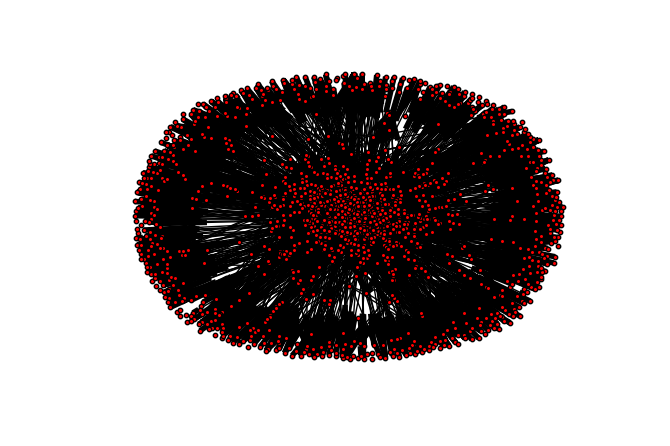

In [132]:
# """
# Draw a graph with matplotlib.
# You must have matplotlib for this to work.
# """
# try:
#     import matplotlib.pyplot as plt
# except:
#     raise

# import networkx as nx

# # G=nx.path_graph(8)

# nx.draw(GG, node_size=10)
# plt.savefig("wtp-network.png") # save as png
# plt.show() # display
# print("WTP-Network")
drawGraph(wtpNetwork, "wtp-network.png")
G = wtpNetwork

## Connected components
The statistics in this section is computed by treating G as undirected graph (UG)

In [98]:
UG = G.to_undirected()
# nC = nx.number_connected_components(UG)
# C = nx.connected_components(UG)
largest_cc = max(nx.connected_components(UG), key=len)
print("number of nodes in large connected component", len(largest_cc))
print("size of giant component compared to original graph", len(largest_cc)/G.number_of_nodes()*100)
print("size of giant component", len(largest_cc))

number of nodes in large connected component 2481
size of giant component compared to original graph 92.36783320923307
size of giant component 2481


## Distance measures


In [99]:
# giant component
GG = G.subgraph(largest_cc)
print("GG is ",nx.is_directed(GG))
print("average distance in giant component: ", nx.average_shortest_path_length(GG))
print(len(GG))

GG is  True
average distance in giant component:  2.3066037367866756
2481


In [100]:
def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))
    


## Dynamic Analysis of WTP-network in Usertalk Namespace

First we need to generate some timeSeries data. The first two series are number of nodes and number of edges for each week.

In [2]:
def createWeeklyGraph(prefix, weekNumber, artifact):
    filePath = prefix + str(weekNumber)
    return createGraph(delim=";",pathtographfile=filePath, artifact=artifact)
   


def buildFileHeader(columns):
    header =""
    for i in range(0,len(columns) - 1):
        header += str(columns[i]) + ";"
    header += str(columns[len(columns) -1])
    return header

def buildFileLine(columns):
    return buildFileHeader(columns)

# return a dictionary representing graph series:
# 'nodes'-> list of number of nodes
# 'edges'-> list of number of edges
# 'date' -> date
def buildTimeSeries(graphs):
    # building timeseries data 
    timeSeries = {}
    # timeSeries['#nodes'] = 2
    # timeSeries['#edges'] = 3
    # print(timeSeries['#nodes'])
    numberOfNodes = []
    numberOfEdges = []
    dates = []
    for i in range(0, 220):
        numberOfNodes.append(graphs[i].number_of_nodes())
        numberOfEdges.append(graphs[i].number_of_edges())
        dates.append(graphs[i].graph['firstDate'])
        
    timeSeries['nodes'] = numberOfNodes
    timeSeries['edges'] = numberOfEdges
    timeSeries['date'] = dates
    return timeSeries

def saveTimeSeries(filePath, timeSeries):
    with open(filePath, 'w') as f:
        f.write(buildFileHeader(list(timeSeries.keys()))+"\n")
        for i in range(len(timeSeries)):
            values = []
            for col in timeSeries.keys():
                values.append(timeSeries[col][i])
            f.write(buildFileLine(values) + "\n")

def buildWeeklyGraphs(prefix, weeks,artifact):
    graphs = []
    for i in range(weeks):
        graphs.append(createWeeklyGraph(prefix, i, artifact))
    return graphs

Now we want to do some time analysis using panda

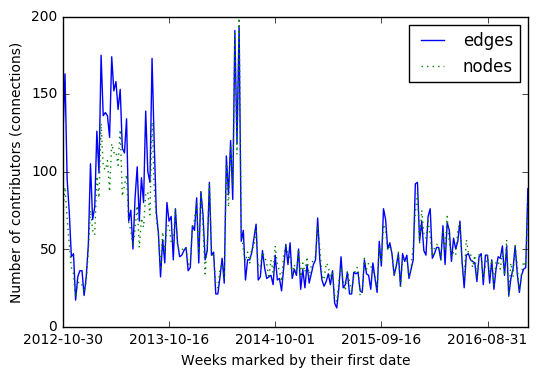

2017-01-11


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading weekly graphd and buid time series from them. Here we consider every communication even they do not contain
# any Wikidata artifact mentions
graphs = buildWeeklyGraphs(prefix="../data/wtp-networks/wtpnetwork_timestamp.csv_",weeks=232,artifact=False)
timeSeries = buildTimeSeries(graphs)
df = pd.DataFrame(timeSeries, index=timeSeries['date'],)
plt.figure()
df.plot(kind="line", style=['-', ':'])
plt.ylabel("Number of contributors (connections)")
plt.xlabel("Weeks marked by their first date")
plt.savefig("../data/wtp-networks/timeseries_nodes_edges.pdf")
plt.show()

print(df['date'][219])



How about now we filter out edge without communication

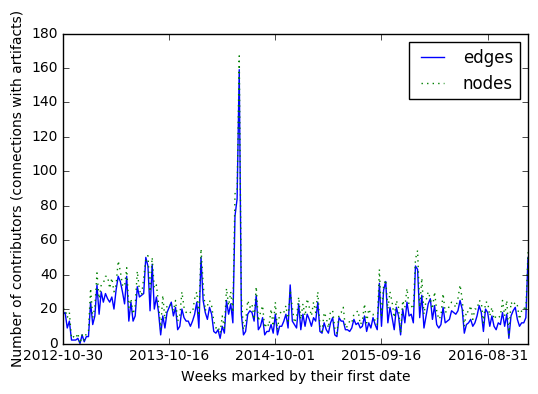

In [39]:
# read in weekly graphs
graphs_with_artifacts = buildWeeklyGraphs(prefix="../data/wtp-networks/wtpnetwork_timestamp.csv_",weeks=232,artifact=True)
timeSeries_with_artifacts = buildTimeSeries(graphs_with_artifacts)
timeSeries_with_artifacts
dfWA = pd.DataFrame(timeSeries_with_artifacts, index=timeSeries['date'],)
plt.figure()

# plot time series
dfWA.plot(kind="line", style=['-', ':'])
plt.ylabel("Number of contributors (connections with artifacts)")
plt.xlabel("Weeks marked by their first date")
plt.savefig("../data/wtp-networks/timeseries_nodes_edges_with_artifacts.pdf")
plt.show()

Since edge and nodes follows closely each other. We plot only edges but this time we plot them together both time series (with and without artifacts)

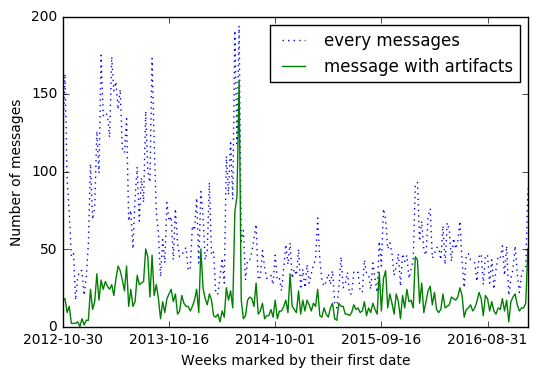

In [52]:
edges = df['edges']
edges_with_artifact = dfWA['edges']
dfComb = pd.DataFrame({'every messages': edges, 'message with artifacts' : edges_with_artifact})
plt.figure()
dfComb.plot(kind = "line", style=[':', '-'])
plt.ylabel("Number of messages")
plt.xlabel("Weeks marked by their first date")
plt.savefig("../data/wtp-networks/timeseries.pdf")
plt.show()

## Inter-Talk Page Network Analysis

In [73]:
print(list('ABCD'))

['A', 'B', 'C', 'D']


In [ ]:
itpNetwork = createGraph("../data/itpnetwork.csv")
print("number of nodes: ",str(itpNetwork.number_of_nodes()))
print("number of edges: ",str(itpNetwork.number_of_edges()))

In [ ]:
computeAndPlotDegreeStats(itpNetwork)

In [ ]:
boxPlotDegreeDist(itpNetwork)

In [ ]:
analyzeComponents(itpNetwork)

In [ ]:
print("ITP-Network")
drawGraph(itpNetwork, "itp-network.png")

## Degree Assortitative Analysis

In [ ]:
degree_assortativity_analysis(itpNetwork, "inter page talk network")
degree_assortativity_analysis(wtpNetwork, "within talk page network")



We now need to verify significant testing with Z-score by generate 100 graphs for each talk page networks with the same in-degree and out-degree sequences.

In [ ]:
# generate 100 random graphs with the same in, out-degree sequence
wtp_in_degs = [node[1] for node in wtpNetwork.in_degree_iter()]
wtp_out_degs = [node[1] for node in wtpNetwork.out_degree_iter()]
wtp_random_graphs = []
for i in range(100):
    wtp_random_graphs.append(nx.directed_configuration_model(wtp_in_degs,wtp_out_degs))

# generate 100 random graphs with the same in, out-degree sequence
itp_in_degs = [node[1] for node in itpNetwork.in_degree_iter()]
itp_out_degs = [node[1] for node in itpNetwork.out_degree_iter()]
itp_random_graphs = []
for i in range(100):
    itp_random_graphs.append(nx.directed_configuration_model(itp_in_degs, itp_out_degs))
    



In [ ]:

compute_z_score_for_assortativity(wtpNetwork, "within talk page network")
compute_z_score_for_assortativity(itpNetwork, "inter talk page network")


Now we compute the statistical significance. According to "Edge direction and structure of networks", Jacob G. Foster et al. r(out,in) (degree assortativity of in degree of source node and out degree of target node) is computed as Pearson correlation between two random variables: X being out degree of source node and Y being in degree of target node. We have similar definitions for r(out,out), r(in,in), and r(in,out).

The Z-score is computed is as how many deviation of r-value from an average (over 100) in our case. 

## Content network analysis


In [ ]:
# there is something odd about some lines in contentnetwork.csv (e.g. ",0,,1"). We need to remove them. 

inputfile = open("../data/contentnetwork.csv", 'r')
outputfile = open("../data/contentnetworkprocessed.csv", 'w+')
for l in inputfile:
    if (not l.startswith(",")):
#         print(l)
        outputfile.write(l.upper())


In [ ]:
itpNetwork = createGraph("../data/contentnetwork.csv")
print("number of nodes: ",str(itpNetwork.number_of_nodes()))
print("number of edges: ",str(itpNetwork.number_of_edges()))

In [ ]:
pitpNetwork = createGraph("../data/contentnetworkprocessed.csv")
print("number of nodes: ",str(pitpNetwork.number_of_nodes()))
print("number of edges: ",str(pitpNetwork.number_of_edges()))

In [ ]:
drawGraph(pitpNetwork, 'content network')

In [ ]:
compute_z_score_for_assortativity(pitpNetwork, "content network")



In [ ]:
boxPlotDegreeDist(pitpNetwork)

## Within talk page in property namespace

In [ ]:
wtppropNetwork = createGraph("../data/wtpnetwork_propertynamespace.csv")
print("number of nodes: ",str(wtppropNetwork.number_of_nodes()))
print("number of edges: ",str(wtppropNetwork.number_of_edges()))

In [ ]:
boxPlotDegreeDist(wtppropNetwork)

In [ ]:
drawGraph(wtppropNetwork, 'wtp network - property talk space')

In [ ]:
compute_z_score_for_assortativity(wtppropNetwork, "wtp network property namespace")

